# Applied Deep Learning Project 1- Data Analysis

In this project, we select a real world dataset and perform statistical analysis on it. For this I selected to Covid-19 dataset available at https://www.kaggle.com/imdevskp/corona-virus-report . In the third part, I will investigate the correlation between the number of confirmed cases in a state and the unemployment rate in that state in the month of may

In [ ]:
#Importing the required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPRegressor


In [ ]:
#Importing the dataset
data = pd.read_csv('usa_county_wise.csv')

In [ ]:
#Few useful displays of the data
data.head(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",1/22/20,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,"Guam, US",1/22/20,0,0
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",1/22/20,0,0
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,"Puerto Rico, US",1/22/20,0,0
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",1/22/20,0,0
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",1/22/20,0,0
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",1/22/20,0,0
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",1/22/20,0,0
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",1/22/20,0,0
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",1/22/20,0,0


In [ ]:
data.tail(10)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
557621,84070002,US,USA,840,NaN,Dukes and Nantucket,Massachusetts,US,41.406747,-70.687635,"Dukes and Nantucket,Massachusetts,US",7/10/20,78,20
557622,84070003,US,USA,840,NaN,Kansas City,Missouri,US,39.099700,-94.578600,"Kansas City,Missouri,US",7/10/20,3040,3
557623,84070004,US,USA,840,NaN,Michigan Department of Corrections (MDOC),Michigan,US,0.000000,0.000000,"Michigan Department of Corrections (MDOC), Mic...",7/10/20,4111,68
557624,84070005,US,USA,840,NaN,Federal Correctional Institution (FCI),Michigan,US,0.000000,0.000000,"Federal Correctional Institution (FCI), Michig...",7/10/20,186,5
557625,84070015,US,USA,840,NaN,Bear River,Utah,US,41.521068,-113.083282,"Bear River, Utah, US",7/10/20,1724,3
557626,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",7/10/20,263,0
557627,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",7/10/20,50,0
557628,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",7/10/20,1949,16
557629,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",7/10/20,63,0
557630,84070020,US,USA,840,NaN,Weber-Morgan,Utah,US,41.271160,-111.914512,"Weber-Morgan, Utah, US",7/10/20,1456,14


In [ ]:
data.shape

(557631, 14)

Let us use the describe function to find the mean and standard deviation of all the confirmed cases and deaths

In [ ]:
#Calculating the mean,std,min and max for the coloumns of the data
data.describe()

,UID,code3,FIPS,Lat,Long_,Confirmed,Deaths
count,5.576310e+05,557631.000000,555921.000000,557631.000000,557631.000000,557631.000000,557631.000000
mean,8.390341e+07,839.445569,32090.929560,37.165903,-89.160375,287.341939,15.450734
std,3.287962e+06,18.066214,17822.427507,8.661135,21.543754,3099.075126,286.036535
min,1.600000e+01,16.000000,60.000000,-14.271000,-170.132000,0.000000,0.000000
25%,8.401904e+07,840.000000,19037.000000,34.237321,-98.066628,0.000000,0.000000
50%,8.403006e+07,840.000000,30045.000000,38.149014,-89.827411,2.000000,0.000000
75%,8.404702e+07,840.000000,47011.000000,41.683301,-82.793570,43.000000,1.000000
max,8.410000e+07,850.000000,99999.000000,69.314792,145.673900,218403.000000,23267.000000


In [ ]:
#Some of the data is of countries other than US in this cell, we are cleaning the data to get rid of any rows for which the country is not USA.
data['iso3'].value_counts()
data.drop(data[data['iso3'] != 'USA'].index, inplace = True) 

In [ ]:
data['iso3'].value_counts()

USA    556776
Name: iso3, dtype: int64

In [ ]:
#Calculating statistics for the cleaned dataset
data.describe()

,UID,code3,FIPS,Lat,Long_,Confirmed,Deaths
count,5.567760e+05,556776.0,555066.000000,556776.000000,556776.000000,556776.000000,556776.000000
mean,8.403226e+07,840.0,32140.254775,37.207365,-89.293868,287.071327,15.452372
std,1.788758e+04,0.0,17791.747417,8.589216,20.705792,3100.920661,286.252183
min,8.400100e+07,840.0,1001.000000,0.000000,-164.035380,0.000000,0.000000
25%,8.401905e+07,840.0,19045.000000,34.256081,-98.066814,0.000000,0.000000
50%,8.403006e+07,840.0,30050.000000,38.162993,-89.900575,2.000000,0.000000
75%,8.404703e+07,840.0,47013.000000,41.683958,-82.815121,43.000000,1.000000
max,8.410000e+07,840.0,99999.000000,69.314792,0.000000,218403.000000,23267.000000


In [ ]:
data['Province_State'].value_counts()

Texas                   43776
Georgia                 27531
Virginia                23085
Kentucky                20862
Missouri                20178
Kansas                  18297
Illinois                17784
North Carolina          17442
Iowa                    17271
Tennessee               16587
Nebraska                16245
Indiana                 16074
Ohio                    15390
Minnesota               15219
Michigan                14877
Mississippi             14364
Oklahoma                13509
Arkansas                13167
Wisconsin               12654
Alabama                 11799
Florida                 11799
Pennsylvania            11799
South Dakota            11628
Colorado                11286
Louisiana               11286
New York                10944
California              10260
Montana                  9918
West Virginia            9747
North Dakota             9405
South Carolina           8208
Idaho                    7866
Washington               7011
Oregon    

In [ ]:
data['Country_Region'].value_counts()

US    556776
Name: Country_Region, dtype: int64

In [ ]:
#As we can see there are no missing values
data.isin(['?']).sum(axis=0)

UID               0
iso2              0
iso3              0
code3             0
FIPS              0
Admin2            0
Province_State    0
Country_Region    0
Lat               0
Long_             0
Combined_Key      0
Date              0
Confirmed         0
Deaths            0
dtype: int64

In [ ]:
#Let us take the data belonging to new york state
data_ny = data[data['Province_State']=='New York' ]

In [ ]:
data_ny.shape


(10944, 14)

In [ ]:
#This plot shows the confirmed cases in NY against time. Althought the graph is pretty bumpy it does look like we have reached the peak in state of NY
plt.figure(figsize=(40,10))
plt.plot(data_ny.Date.unique(), data_ny.groupby('Date')['Confirmed'].sum())
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases in New York')
plt.title('New York covid-19 Statistics')
plt.xticks(rotation='vertical')

plt.savefig('NY_cases.png', dpi=80)

plt.show()

<Figure size 4000x1000 with 1 Axes>

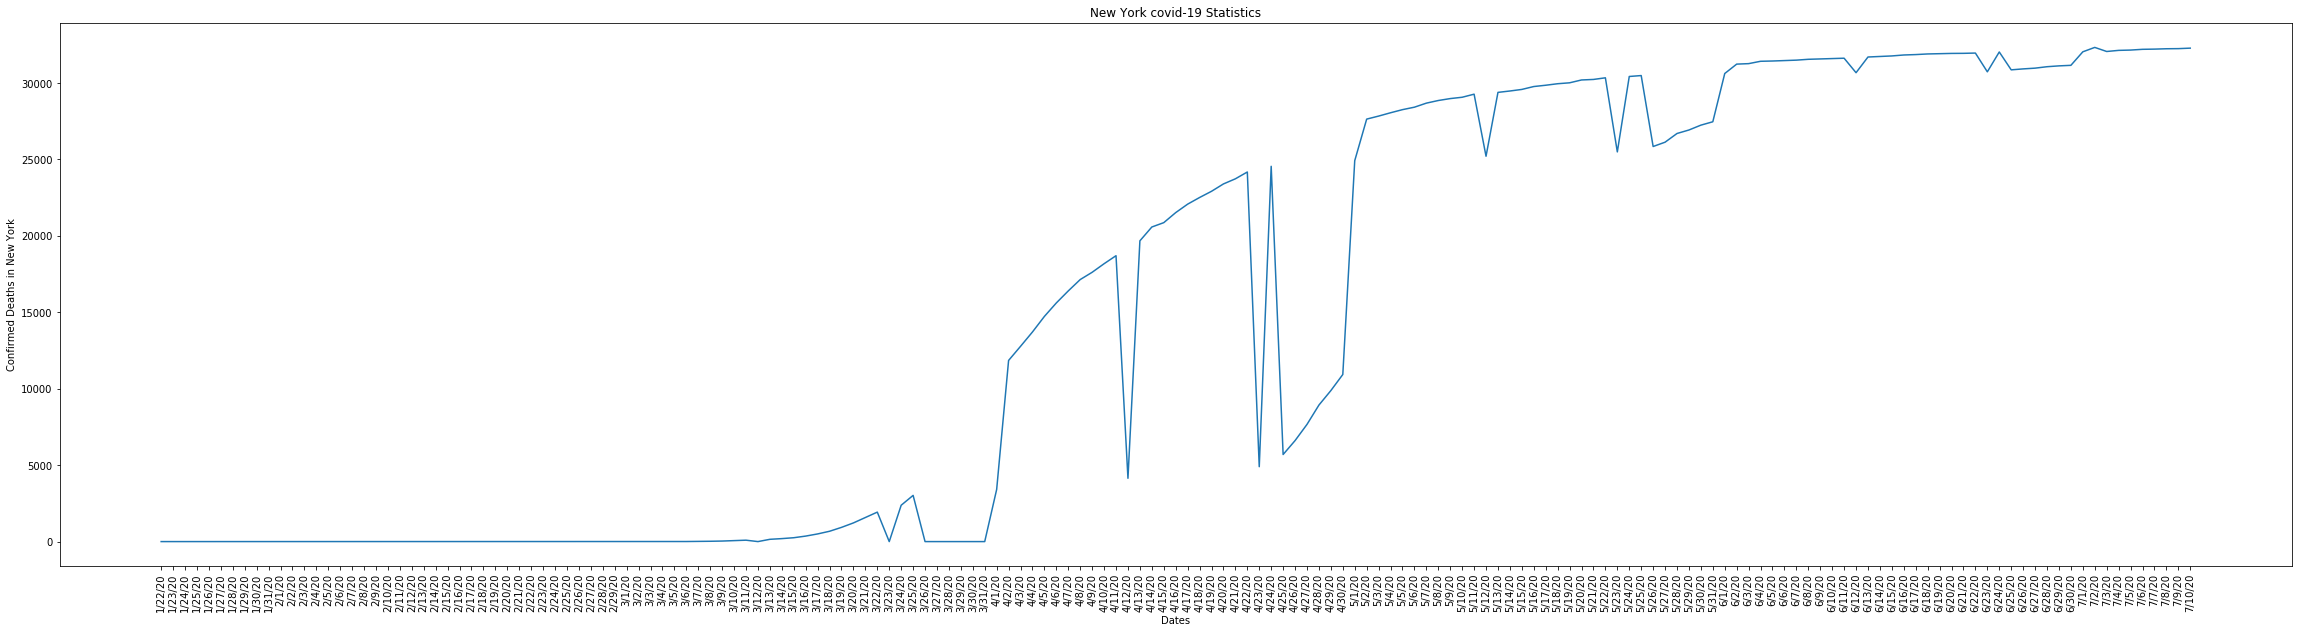

In [ ]:
#This plot shows the confirmed deaths in NY against time. THe graph almost seems to be  linear at the end so looks like we reached the peak of the death rates.

plt.figure(figsize=(40,10))
plt.plot(data_ny.Date.unique(), data_ny.groupby('Date')['Deaths'].sum())
plt.xlabel('Dates')
plt.ylabel('Confirmed Deaths in New York')
plt.title('New York covid-19 Statistics')
plt.xticks(rotation='vertical')

plt.savefig('NY_deaths.png', dpi=80)

plt.show()

In [ ]:
#Let us take the data for the month of june in NY
data_ny_june = data_ny[(data_ny['Date']>='6/1/2020') & (data_ny['Date']<'6/30/2020')]

In [ ]:
data_ny_june.shape


(1472, 14)

In [ ]:
data_ny_june['Confirmed'].min()

0

In [ ]:
data_ny_june['Confirmed'].max()

215179

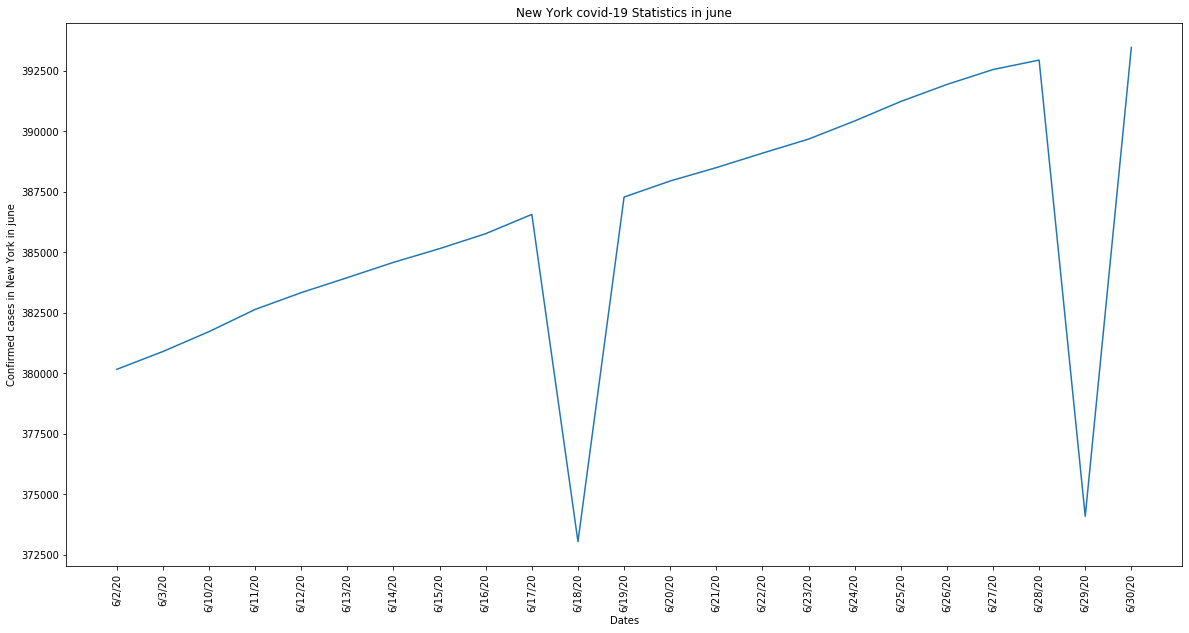

In [ ]:
# This graph shows the confirmed cases in NY in june as we observe, the number of cases are still rising but in a small number

plt.figure(figsize=(20,10))
plt.plot(data_ny_june.Date.unique(), data_ny_june.groupby('Date')['Confirmed'].sum())
plt.xlabel('Dates')
plt.ylabel('Confirmed cases in New York in june')
plt.title('New York covid-19 Statistics in june')
plt.xticks(rotation='vertical')

plt.savefig('NY_cases_june.png', dpi=80)

plt.show()

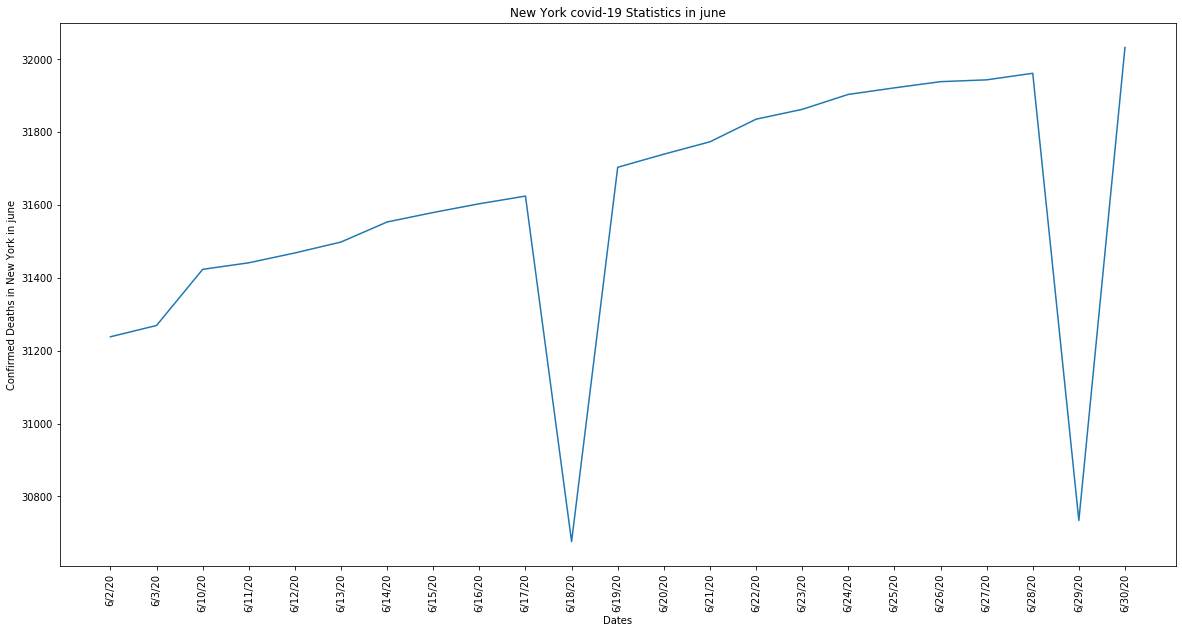

In [ ]:
#data_ny_june['Confirmed'].sort_index().plot.hist()
plt.figure(figsize=(20,10))
plt.plot(data_ny_june.Date.unique(), data_ny_june.groupby('Date')['Deaths'].sum())
plt.xlabel('Dates')
plt.ylabel('Confirmed Deaths in New York in june')
plt.title('New York covid-19 Statistics in june')
plt.xticks(rotation='vertical')

plt.savefig('NY_deaths_june.png', dpi=80)

plt.show()

In [ ]:
#Let us take the data for erie county
erie_county_data = data_ny[data_ny['Admin2']=='Erie']

In [ ]:
erie_county_data

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
1847,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",1/22/20,0,0
5108,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",1/23/20,0,0
8369,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",1/24/20,0,0
11630,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",1/25/20,0,0
14891,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",1/26/20,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543173,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",7/6/20,7500,639
546434,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",7/7/20,7544,639
549695,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",7/8/20,7596,639
552956,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",7/9/20,7624,639


In [ ]:
erie_county_data['Confirmed'].max()

7660

In [ ]:
erie_county_data['Confirmed'].min()

0

In [ ]:
erie_county_data['Deaths'].max()

644

In [ ]:
erie_county_data['Deaths'].min()

0

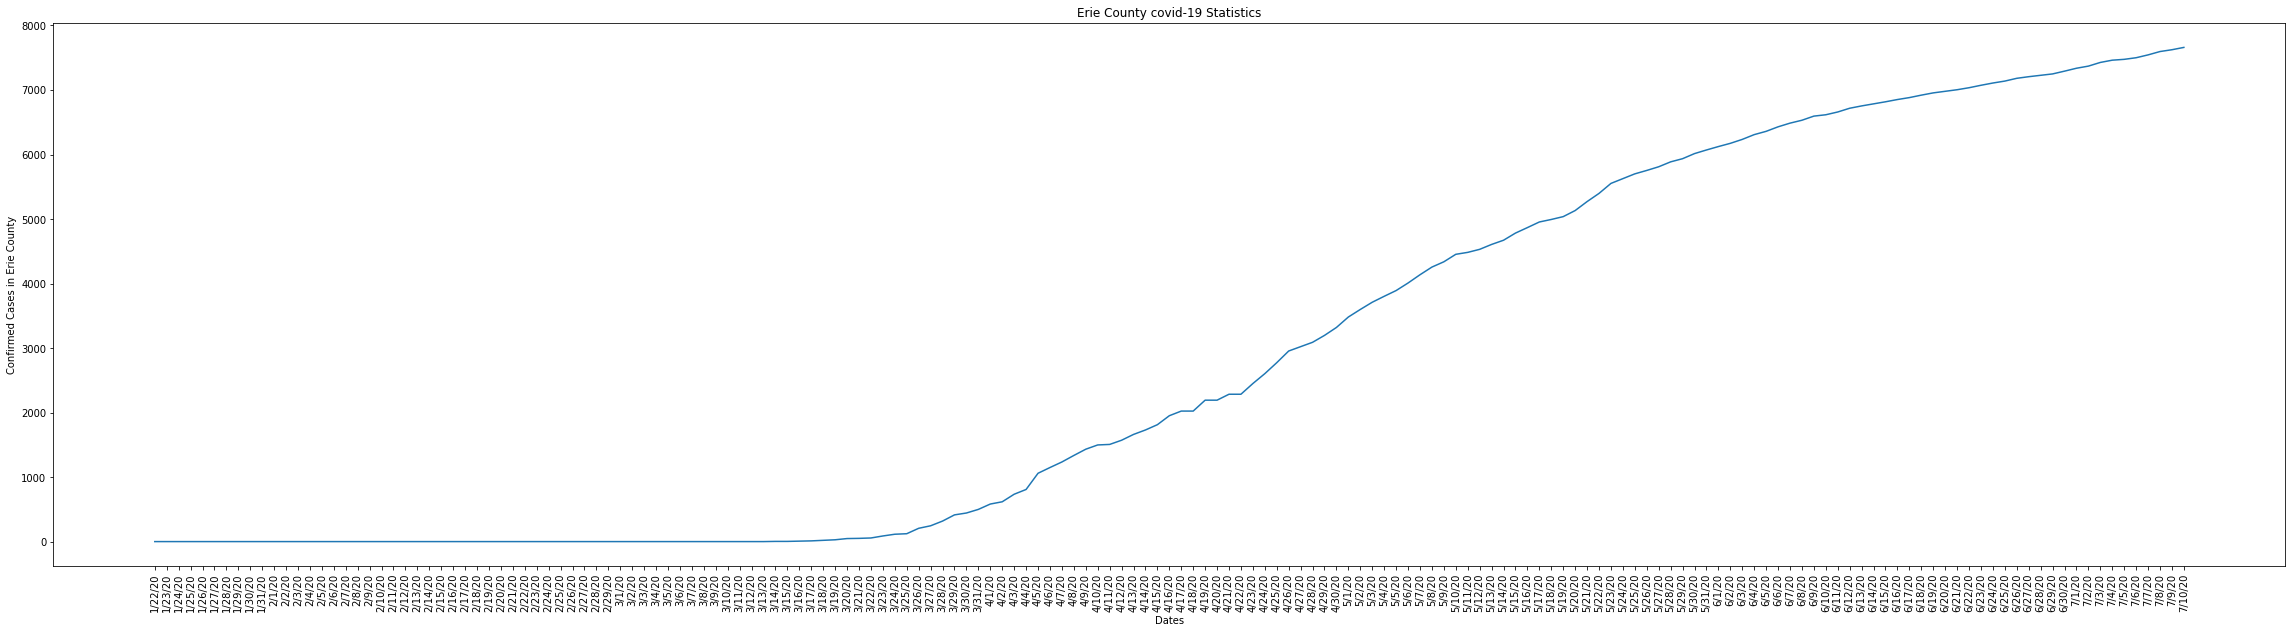

In [ ]:
# THe plot of cases against time in Erie County. The cases are still rising day by day, but by a small number
plt.figure(figsize=(40,10))
plt.plot(erie_county_data['Date'], erie_county_data['Confirmed'])
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases in Erie County')
plt.title('Erie County covid-19 Statistics')
plt.xticks(rotation='vertical')

plt.savefig('erie_cases.png', dpi=80)

plt.show()

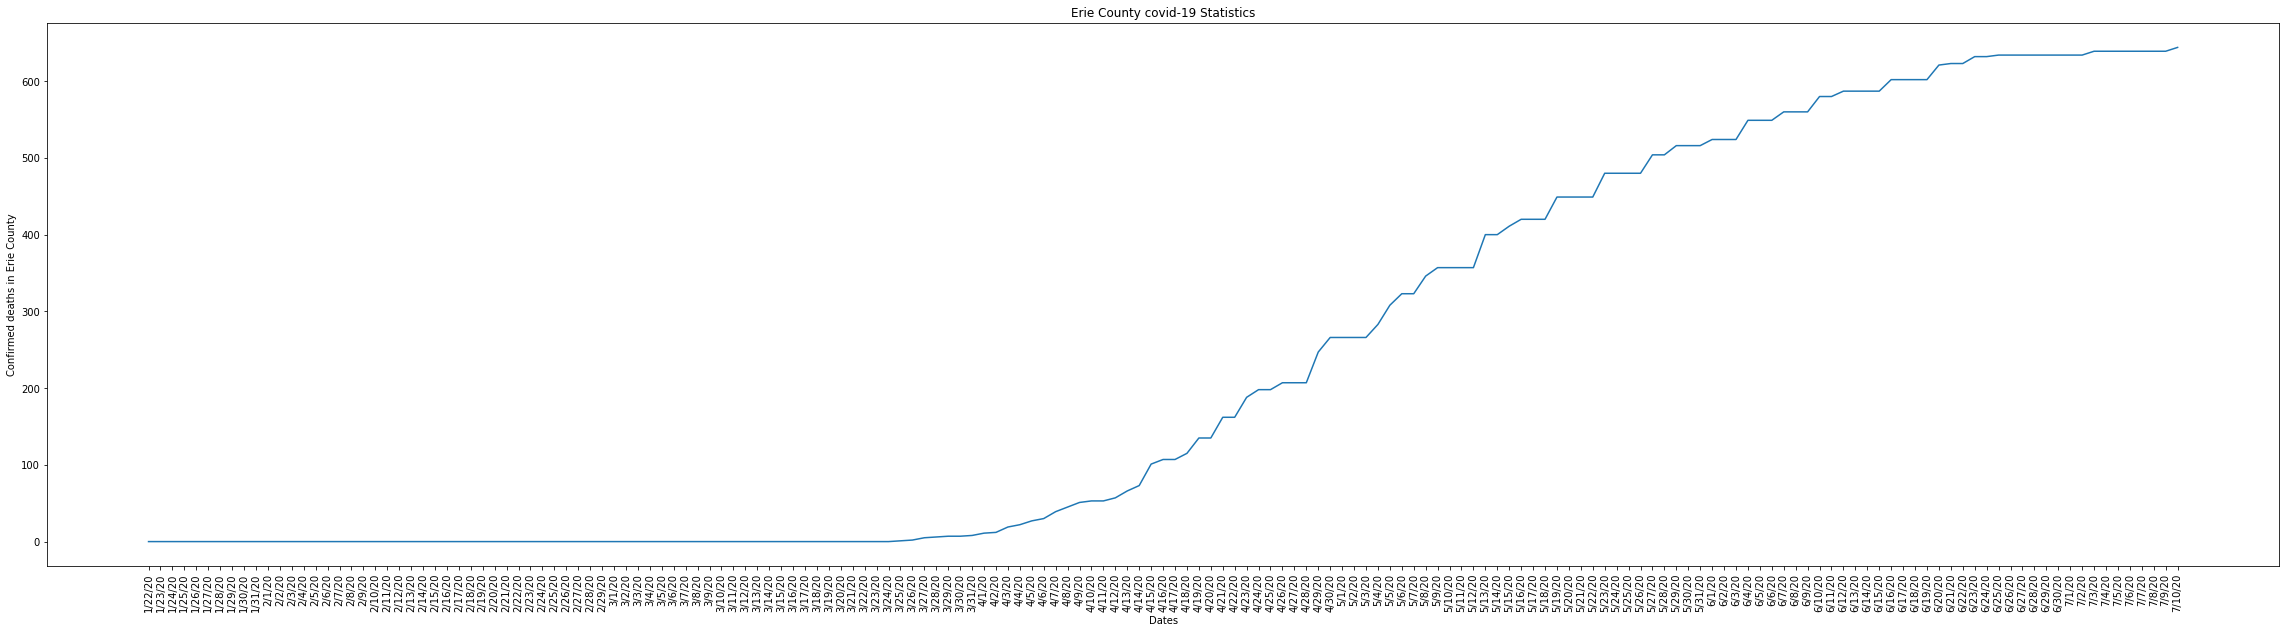

In [ ]:
# The graph of deaths against date. THe deaths are also increasing but by a small number
plt.figure(figsize=(40,10))
plt.plot(erie_county_data['Date'], erie_county_data['Deaths'])
plt.xlabel('Dates')
plt.ylabel('Confirmed deaths in Erie County')
plt.title('Erie County covid-19 Statistics')
plt.xticks(rotation='vertical')
plt.savefig('erie_deaths.png', dpi=80)

plt.show()

In [ ]:
# Erie county data for june
erie_county_june = data_ny_june[data_ny_june['Admin2']=='Erie']

In [ ]:
erie_county_june.shape

(23, 14)

In [ ]:
erie_county_june['Confirmed'].max()

7292

In [ ]:
erie_county_june['Confirmed'].max()

7292

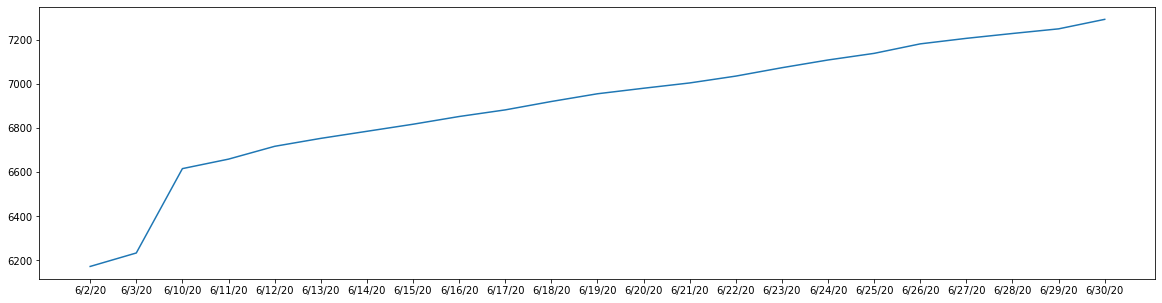

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(erie_county_june['Date'], erie_county_june['Confirmed'])
plt.show()

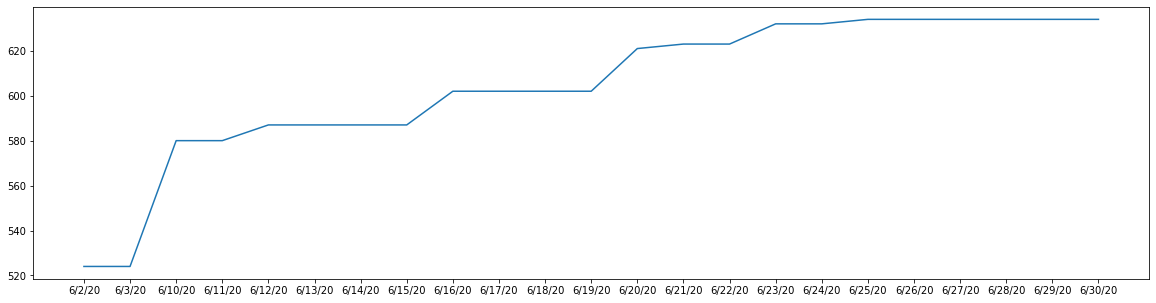

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(erie_county_june['Date'], erie_county_june['Deaths'])
plt.show()

In [ ]:
#Erie county data for may
erie_may = data[(data['Province_State']=='New York') & (data['Admin2'] == 'Erie') & (data['Date']>='5/1/2020') & (data['Date']<'5/31/2020') ]

In [ ]:
erie_may

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
331208,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",5/2/20,3598,266
334469,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",5/3/20,3710,266
357296,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",5/10/20,4453,357
360557,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",5/11/20,4483,357
363818,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",5/12/20,4530,357
367079,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",5/13/20,4606,400
370340,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",5/14/20,4671,400
373601,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",5/15/20,4782,411
376862,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",5/16/20,4867,420
380123,84036029,US,USA,840,36029.0,Erie,New York,US,42.76249,-78.730637,"Erie, New York, US",5/17/20,4954,420


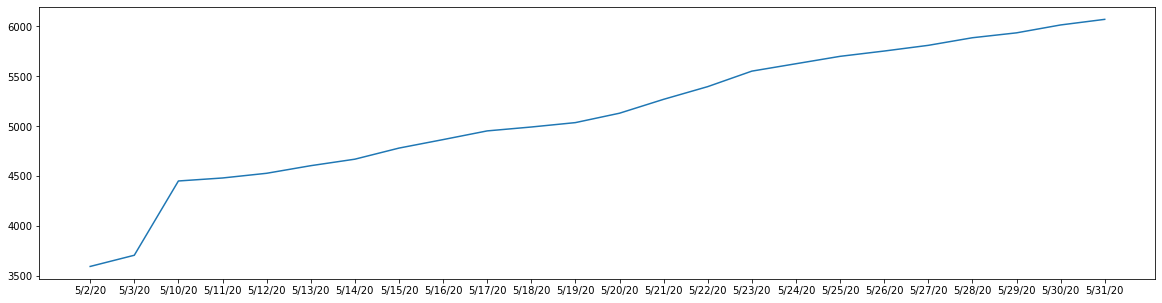

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(erie_may['Date'], erie_may['Confirmed'])
plt.show()

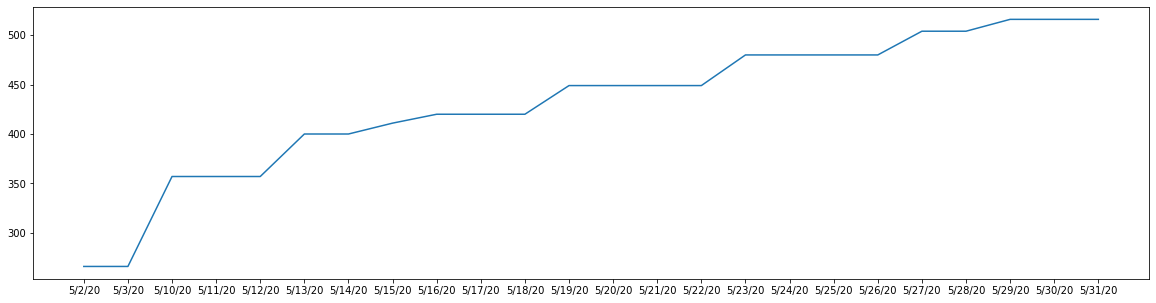

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(erie_may['Date'], erie_may['Deaths'])
plt.show()

# Part 2: Machine learning models:

In this part, we use machine learning models on the NY cases dataset. The selction of features is quite tricky but I selected the county id and the number of confirmed cases to predict the number of death cases in a particular county. I trained 5 regression models for the above problem.






In [ ]:
data_ny.shape

(10944, 14)

In [ ]:
data_ny.head(10)
#data_ny.drop('UID','iso2')

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
1833,84036001,US,USA,840,36001.0,Albany,New York,US,42.600603,-73.977239,"Albany, New York, US",1/22/20,0,0
1834,84036003,US,USA,840,36003.0,Allegany,New York,US,42.257484,-78.027505,"Allegany, New York, US",1/22/20,0,0
1835,84036005,US,USA,840,36005.0,Bronx,New York,US,40.852093,-73.862828,"Bronx, New York, US",1/22/20,0,0
1836,84036007,US,USA,840,36007.0,Broome,New York,US,42.159032,-75.813261,"Broome, New York, US",1/22/20,0,0
1837,84036009,US,USA,840,36009.0,Cattaraugus,New York,US,42.247782,-78.679231,"Cattaraugus, New York, US",1/22/20,0,0
1838,84036011,US,USA,840,36011.0,Cayuga,New York,US,42.912617,-76.557316,"Cayuga, New York, US",1/22/20,0,0
1839,84036013,US,USA,840,36013.0,Chautauqua,New York,US,42.227692,-79.366918,"Chautauqua, New York, US",1/22/20,0,0
1840,84036015,US,USA,840,36015.0,Chemung,New York,US,42.138911,-76.763880,"Chemung, New York, US",1/22/20,0,0
1841,84036017,US,USA,840,36017.0,Chenango,New York,US,42.494300,-75.608876,"Chenango, New York, US",1/22/20,0,0
1842,84036019,US,USA,840,36019.0,Clinton,New York,US,44.745309,-73.678754,"Clinton, New York, US",1/22/20,0,0


In [ ]:
data_ny = data_ny.drop(['UID','iso2','iso3','code3','Country_Region','Lat','Long_','Combined_Key','Province_State'],axis = 1)

In [ ]:
data_ny

,FIPS,Admin2,Date,Confirmed,Deaths
1833,36001.0,Albany,1/22/20,0,0
1834,36003.0,Allegany,1/22/20,0,0
1835,36005.0,Bronx,1/22/20,0,0
1836,36007.0,Broome,1/22/20,0,0
1837,36009.0,Cattaraugus,1/22/20,0,0
...,...,...,...,...,...
556262,36119.0,Westchester,7/10/20,35226,1433
556263,36121.0,Wyoming,7/10/20,101,5
556264,36123.0,Yates,7/10/20,48,6
557549,80036.0,Out of NY,7/10/20,0,0


In [ ]:
#len(data_ny['Date'].unique())

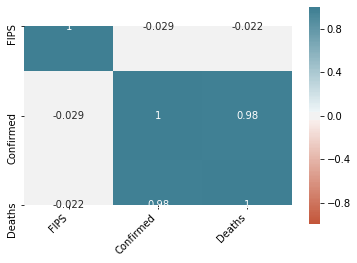

In [ ]:
corr = data_ny.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
#import datetime as dt
#data_ny['Date'] = pd.to_datetime(data_ny['Date'])
#data_ny['Date']=data_ny['Date'].map(dt.datetime.toordinal)

In [ ]:
#data_ny

In [ ]:
#len(data_ny['Date'].unique())

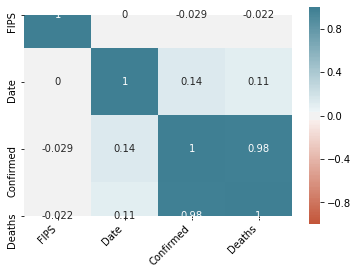

In [ ]:
corr = data_ny.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
feature_cols=['FIPS','Confirmed']
X = data_ny[feature_cols]

In [ ]:
X

,FIPS,Confirmed
1833,36001.0,0
1834,36003.0,0
1835,36005.0,0
1836,36007.0,0
1837,36009.0,0
...,...,...
556262,36119.0,35226
556263,36121.0,101
556264,36123.0,48
557549,80036.0,0


In [ ]:
y = data_ny['Deaths']
y

1833         0
1834         0
1835         0
1836         0
1837         0
          ... 
556262    1433
556263       5
556264       6
557549       0
557601       0
Name: Deaths, Length: 10944, dtype: int64

In [ ]:
#Spliting the data into training and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=1)

In [ ]:
X_test.shape

(2189, 2)

In [ ]:

y_test.shape

(2189,)

In [ ]:
#Normalizing the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [ ]:
y_test.shape

(2189,)

In [ ]:
X_test.shape

(2189, 2)

In [ ]:
#Using sklearns linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)
linear_regression_score = regressor.score(X_test, y_test)
print("Linear Regression Score:", linear_regression_score)

Linear Regression Score: 0.9599383721070465


In [ ]:
#Using sklearns Decision tree regressor model
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
tree_score = regressor.score(X_test, y_test)
print("DT Score:", regressor.score(X_test, y_test))

DT Score: 0.9994263184777422


In [ ]:
#Using sklearns Random forest regressor model 
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
forest_score = regressor.score(X_test, y_test)
print("RF Score:", regressor.score(X_test, y_test))

RF Score: 0.9996224487738364


In [ ]:
#Using plynomial regression using polynomial features
poly_reg = PolynomialFeatures(degree = 5)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)
poly_score = regressor.score(poly_reg.transform(X_test), y_test)
print("Poly Score:", regressor.score(poly_reg.transform(X_test), y_test))

Poly Score: 0.9856681149443347


In [ ]:
# using sklearns MLP Regressor model

clf = MLPRegressor(max_iter=10000)
clf.fit(X_train, np.asarray(y_train).ravel())
mlp_regressor_score = clf.score(X_test, y_test)
print('MLP Regressor Score:', mlp_regressor_score)

MLP Regressor Score: 0.9970840042842543


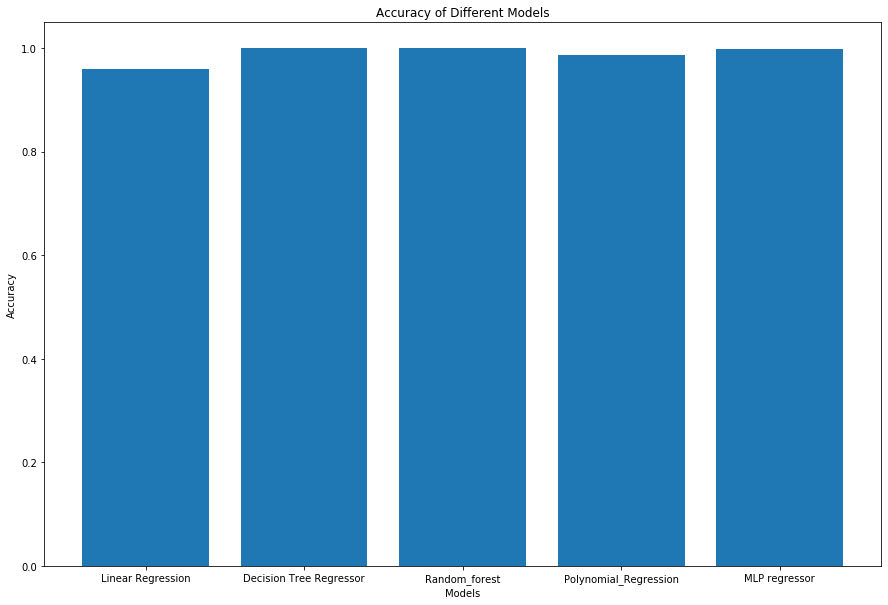

In [ ]:
# Representing the accuracy of various models on a bar graph
objects = ('Linear Regression' , 'Decision Tree Regressor', 'Random_forest', 'Polynomial_Regression','MLP regressor')
scores = [linear_regression_score, tree_score, forest_score, poly_score,mlp_regressor_score]
plt.figure(figsize=(15, 10))
plt.bar(objects, scores, align='center', alpha=1.0)
plt.xticks(objects)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.show()

# Part 3: Correlation between different dataset

For this part, I chose to calculate the correlation between the confirmed cases and the unemployment rate for the month of may across USA. I got some interesting results int he end which i try my best to explain. I got the unemployment rate data from https://www.bls.gov/web/laus/lauhsthl.htm. 

In [ ]:
# Getting the may data
data_may = data[(data['Date']>='5/1/2020') & (data['Date']<='5/31/2020')]

In [ ]:
data_may

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Date,Confirmed,Deaths
329366,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",5/2/20,45,3
329367,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,"Baldwin, Alabama, US",5/2/20,181,4
329368,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,"Barbour, Alabama, US",5/2/20,43,1
329369,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,"Bibb, Alabama, US",5/2/20,42,0
329370,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,"Blount, Alabama, US",5/2/20,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427186,84070016,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",5/31/20,38,0
427187,84070017,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",5/31/20,24,0
427188,84070018,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",5/31/20,440,4
427189,84070019,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,"TriCounty, Utah, US",5/31/20,21,0


In [ ]:
required_cols = ['Province_State','Confirmed','Deaths']

In [ ]:
# we only need the states confirmed cases and deaths in the final dataframe
final_data = data_may[required_cols]
final_data

,Province_State,Confirmed,Deaths
329366,Alabama,45,3
329367,Alabama,181,4
329368,Alabama,43,1
329369,Alabama,42,0
329370,Alabama,40,0
...,...,...,...
427186,Utah,38,0
427187,Utah,24,0
427188,Utah,440,4
427189,Utah,21,0


In [ ]:
# In this cell, we calculate the sum of all the confirmed cases and confirmed deaths by grouping the data accoring to the states. The result is store in a list 
final_data
final_data = [final_data['Province_State'].unique(), final_data.groupby('Province_State')['Confirmed'].sum(), final_data.groupby('Province_State')['Deaths'].sum()]
final_data=np.array(final_data)

In [ ]:
# The list is then converted into a dataframe
final_df=pd.DataFrame(final_data.T, columns=['states','confirmed','deaths']) 


In [ ]:
# The data contains data of the diamond princess and grand princess yatch that we drop here
final_df.drop(final_df[final_df['states'] == 'Diamond Princess'].index, inplace = True) 
final_df.drop(final_df[final_df['states'] == 'Grand Princess'].index, inplace = True) 


In [ ]:
#Importing the unemployment dataset
unemployment = pd.read_csv('unemployment during may.csv',names = ['state','unemployment during may','historical high date','historical high rate','historical low date','historical low rate'])

In [ ]:
req_coloumns = ['state','unemployment during may']
final_unemployment = unemployment[req_coloumns]

In [ ]:
#Combining the two dataframes into one along the coloumn axis
combined_df = pd.concat([final_df, final_unemployment],axis = 1,sort=False)

In [ ]:
combined_df

,states,confirmed,deaths,state,unemployment during may
0,Alabama,311242,12076,Alabama,9.9
1,Alaska,9585,738,Alaska,12.6
2,Arizona,350304,16775,Arizona,8.9
3,Arkansas,125003,2559,Arkansas,9.5
4,California,2045012,81216,California,16.3
5,Colorado,537727,29208,Colorado,10.2
6,Connecticut,906661,82132,Connecticut,9.4
7,Delaware,189401,7039,Delaware,15.8
8,District of Columbia,1176,0,District of Columbia,8.9
9,Florida,176840,9405,Florida,14.5


In [ ]:
# we calculate the correlation between confirmed cases and unemployment rate
confirmed_cases = combined_df['confirmed']
unemployment_rate = combined_df['unemployment during may']

# We use pearson coefficient for calculating the correlation. The formulae of pearson coefficient is
![alt text](https://i0.wp.com/www.questionpro.com/blog/wp-content/uploads/2020/04/pearson-formula.png?w=437&ssl=1)


In [ ]:
from numpy import cov
from scipy import stats
correlation, p_value = stats.pearsonr(confirmed_cases, unemployment_rate)
print(correlation)

-0.07980947892675593


In [ ]:
confirmed_deaths = combined_df['deaths']
unemployment_rate = combined_df['unemployment during may']

In [ ]:

correlation, p_value = stats.pearsonr(confirmed_deaths, unemployment_rate)
print(correlation)

-0.10477711413863369


As we can see the the number of cases in a state and the unemployment rate is not correlated. Looking at the data it isnt a surprise,  New york has a confirmed cases of 3553576 but the unemployment rate is only 14.5 . But for the state of nevada, the number of confirmed cases is only 11386 but the unemployment rate is 25.3% . This doesnt mean that the unemployment rate is not at all related to Covid - 19. There may be other reasons like the fall in economy of the state, the lockdown duration in that state, the shutting of business etc. Also I guess,the rate is calculated using the population of the state so it would be better if we calculate the correlation between the number of people unemployed and the confirmed cases but I wasnt able to get that data in the US gov website.

References:
https://www.bls.gov/web/laus/laumstcm.htm
https://www.kaggle.com/imdevskp/corona-virus-report?select=country_wise_latest.csv
https://scikit-learn.org/stable/index.html
https://stackoverflow.com/questions/45264141/convert-array-into-dataframe-in-python
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
https://towardsdatascience.com/pearson-coefficient-of-correlation-explained-369991d93404